## Figures for BglB thermal stability paper 

### Contents

Summary statistics and those that don't fit neatly into categories below: 

+ unique positions list 
+ PyMOL commands for making a figure showing all the positions mutated 
+ list of mutants that don't express 

Conservation: 

+ percent conservation for each residue from alignment of BglB to Pfam GH1 (1,554 sequences)
+ plot of conservation across BglB sequence 
+ sequence logo 

Visualization of expression, Tm, kcat, KM, and kcat/KM for all 128 mutants 

+ diverging color heat map 
+ compact, minimalistic bar plots 

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt 
import pandas
from numpy import log10, log2, inf, nan, arange, linspace 

In [3]:
df = pandas.read_csv( '../data_sets/experimental_data/thermo_paper_data_set.csv', index_col=0 )

### Summary statistics and those that don't fit neatly into categories below

Number of sequence positions mutated:

In [4]:
len( df.sequence_pos.unique() ) 

68

How could you quickly select them in PyMOL? You could use: 

In [6]:
s = '+'.join( [ i for i in df.sequence_pos.dropna().astype( int ).astype( str ) ] ) 
print( 'select all_mutants, resi', s )

select all_mutants, resi 12+14+15+16+16+17+17+18+19+19+19+19+32+34+52+72+76+91+101+119+119+119+120+120+120+121+154+163+163+163+163+163+164+164+164+166+167+167+171+171+175+177+177+177+178+178+192+218+220+220+220+220+220+221+222+222+222+222+222+222+236+240+240+240+240+244+244+249+261+293+293+293+293+293+294+294+294+295+295+296+296+298+300+313+315+315+323+323+325+325+325+325+325+325+329+331+341+343+352+353+354+355+358+362+373+379+379+399+399+399+399+399+400+403+404+404+406+406+407+407+407+407+407+407+409+415+415+423


List of mutants that do not express:

In [7]:
df[( df.expression == 0 )].index

Index(['G12N', 'S16N', 'Q19P', 'S32L', 'W34A', 'F72H', 'R76A', 'H119E',
       'W120A', 'D121F', 'N163K', 'N163E', 'E164G', 'E164R', 'H178R', 'A236E',
       'R240E', 'A249E', 'M261D', 'N293D', 'N293K', 'Y294L', 'T296E', 'H315N',
       'M323K', 'W325G', 'P329N', 'F343S', 'G355A', 'H379T', 'D403A', 'W407Y',
       'W407A', 'W407Q', 'W407R', 'W407G', 'W407K'],
      dtype='object', name='mutant')

### Conservation along BglB sequence 

Alignment of 1554 Pfam sequences that we trimmed by hand to have catalytic residues as in previous paper 



In [10]:
dat = pandas.read_csv( 'alignment/logo-data-bagel-aligned.txt', sep='\s+' ) 
dat['sequence_pos'] = dat.index + 1 
print( len( dat ) )

445


In [11]:
aas = [ u'A', u'C', u'D', u'E', u'F', u'G', u'H', u'I', u'K', u'L', u'M', u'N', u'P', u'Q', u'R', u'S', u'T', u'V', u'W', u'Y' ]

In [12]:
clean_dat = dat[ aas ].copy()
clean_dat.index = dat.amino_acid 

percents = []
for idx, row in clean_dat.iterrows():
    percents.append( row[ idx.upper() ].astype( float ) / row.sum()  )
    
clean_dat['percents'] = percents
clean_dat['sequence_pos'] = range( 1, 446 ) 
clean_dat[ 'entropy' ] = dat.Entropy

In [14]:
print( len( clean_dat ) )
clean_dat.sample( 5 ) 

445


,A,C,D,E,F,G,H,I,K,L,...,Q,R,S,T,V,W,Y,percents,sequence_pos,entropy
amino_acid,,,,,,,,,,,,,,,,,,,,,
p,11,0,15,1,0,3,4,1,0,1,...,2,2,67,33,0,0,0,0.871239,258,NaN
r,9,1,0,0,0,0,2,1,4,0,...,22,1539,2,1,0,0,0,0.972205,372,NaN
q,557,1,194,169,0,46,9,1,263,16,...,144,109,21,5,5,3,1,0.091313,65,NaN
e,235,5,136,233,17,63,19,18,105,24,...,126,51,146,56,44,2,34,0.154305,259,NaN
k,441,8,24,216,7,52,3,30,52,119,...,34,72,20,115,341,0,5,0.032891,142,NaN


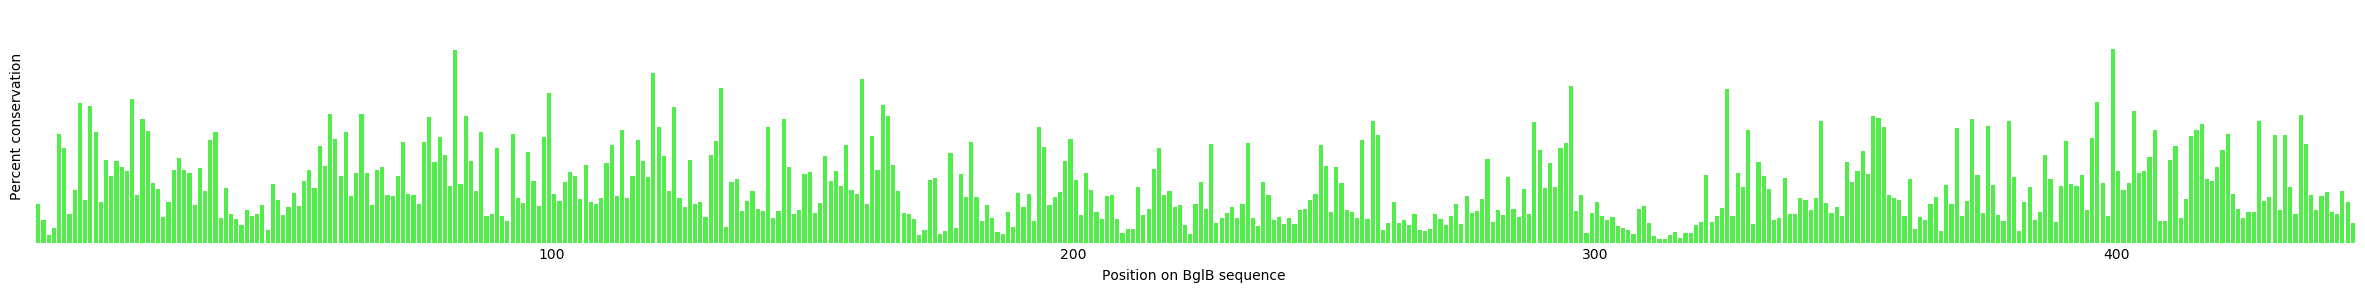

In [15]:
plt.figure( figsize=( 30, 3 ) ) 
#plt.scatter( dat.sequence_pos, ( dat.Entropy / dat.Entropy.max()) ,color='k', label='Entropy (normalized to 1)', marker='.' )
plt.bar( dat.sequence_pos, ( dat.Entropy / dat.Entropy.max()) , lw=0, color=(0.03,.9,0,0.7), label='Entropy' )
#plt.bar( clean_dat.sequence_pos, clean_dat.percents, lw=0, color=(0,0,1,0.1), label='Percent conserved' ) 
#plt.plot( clean_dat.sequence_pos, clean_dat.percents, color='g', label='Percent conserved' ) 

plt.xlim( 0, 446 ) 
plt.ylim( 0, 1.2 ) 
plt.xticks( [ 100, 200, 300, 400 ] ) 
#plt.xticks( [] ) 
plt.ylabel( 'Percent conservation' )
plt.xlabel( 'Position on BglB sequence' ) 
plt.tick_params( length=0 ) 
plt.yticks( [] ) 
#plt.legend()
plt.box(0)
plt.show()

In [16]:
my_percent_conserved = clean_dat[ [ 'sequence_pos', 'percents' ] ]
my_percent_conserved.index = my_percent_conserved.sequence_pos
my_dict = dict( my_percent_conserved.percents ) 

### Depiction of expression, Tm, kcat, KM, and kcat/KM for 128 mutants 

Heat map style uses a diverging (red/blue) color map to compare the log values relative to wild type

In [52]:
# heat map 

h_cols = [ 'expression', 'tm', 'kcat', 'km', 'kcatkm', 'sequence_pos' ] 
h = df[ h_cols ].copy()

h.tm = h.tm - 39.93 
h.kcat = log10( h.kcat / 880 ) 
h.km = log10( (1/h.km) / (1/5.) )
h.kcatkm = log10( h.kcatkm / 174000 )  
h.expression = h.expression # boolean 
h['percent_conserved'] = h.sequence_pos.map( my_dict )
#h.replace( [ -inf ], -5, inplace=True ) # damn son
h = h.sort_values( by='sequence_pos', ascending=True )

# sanity check: what are the WT values after this procedure?  
print( h.loc[ 'BglB' ] )

print( h.head() ) 

expression           1.0
tm                   0.0
kcat                 0.0
km                   0.0
kcatkm               0.0
sequence_pos         NaN
percent_conserved    NaN
Name: BglB, dtype: float64
        expression    tm      kcat        km    kcatkm  sequence_pos  \
mutant                                                                 
G12N             0   NaN       NaN       NaN       NaN          12.0   
S14A             1  0.23 -0.439333 -0.217484 -0.651460          14.0   
T15A             1 -0.76 -0.156314 -0.025306 -0.176657          15.0   
S16A             1 -0.41 -0.756962 -0.447468 -1.199275          16.0   
S16N             0   NaN       NaN       NaN       NaN          16.0   

        percent_conserved  
mutant                     
G12N             0.962179  
S14A             0.157390  
T15A             0.615834  
S16A             0.402336  
S16N             0.402336  


In [53]:
print( h.describe() )

       expression         tm       kcat         km     kcatkm  sequence_pos  \
count  129.000000  69.000000  80.000000  80.000000  92.000000    128.000000   
mean     0.713178  -0.590725  -0.836934  -0.172412  -1.449682    241.531250   
std      0.454041   1.618392   0.948346   0.391784   1.515885    122.181737   
min      0.000000  -5.680000  -2.944483  -1.251297  -4.240549     12.000000   
25%      0.000000        NaN        NaN        NaN        NaN           NaN   
50%      1.000000        NaN        NaN        NaN        NaN           NaN   
75%      1.000000        NaN        NaN        NaN        NaN           NaN   
max      1.000000   2.720000   1.097344   1.096910   0.955350    423.000000   

       percent_conserved  
count         128.000000  
mean            0.499220  
std             0.355953  
min             0.001263  
25%                  NaN  
50%                  NaN  
75%                  NaN  
max             1.000000  


/usr/local/bin/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


### Color maps 

We need color maps for 

|parameter|type|range|colors|n_bins|bins|
---|---
|protein expression|binary|[0,1]|white-black|2|[0],[1]|
|tm|float|[-6,4]|purple green yellow|5|[-1,1], [1-3], [>3], [-3,-1], [<-3]|
|kcat, km, kcat/km|[-5,2]|navy gray gold|?|[-1,1], [-3,-1], [>-3], [1,3], 


In [46]:
# what if we just made a matrix with all the color values in it
# and then passed that to imshow? 

colors = [
    [ ( 0, 0, 0, x.round(2) ) for x in h[ 'percent_conserved' ] ], 
    [ ( 0, 0, 0, x ) for x in h[ 'expression' ] ], 
]
    
colors = pandas.DataFrame( colors ).T

colors.sample( 5 ) 

,0,1
49,"(0, 0, 0, 0.36)","(0, 0, 0, 1)"
22,"(0, 0, 0, 0.45)","(0, 0, 0, 1)"
79,"(0, 0, 0, 0.28)","(0, 0, 0, 1)"
83,"(0, 0, 0, 0.03)","(0, 0, 0, 1)"
20,"(0, 0, 0, 0.99)","(0, 0, 0, 1)"


In [47]:
# correlations between experimental values 
h.corr( method='pearson' )

,expression,tm,kcat,km,kcatkm,sequence_pos,percent_conserved
expression,1.000000,NaN,NaN,NaN,0.194055,0.015245,-0.250323
tm,NaN,1.000000,-0.037909,-0.143028,-0.024171,0.154691,0.239670
kcat,NaN,-0.037909,1.000000,0.154804,0.941022,-0.322746,-0.693856
km,NaN,-0.143028,0.154804,1.000000,0.437564,0.077674,-0.154620
kcatkm,0.194055,-0.024171,0.941022,0.437564,1.000000,-0.158393,-0.694454
sequence_pos,0.015245,0.154691,-0.322746,0.077674,-0.158393,1.000000,0.024341
percent_conserved,-0.250323,0.239670,-0.693856,-0.154620,-0.694454,0.024341,1.000000


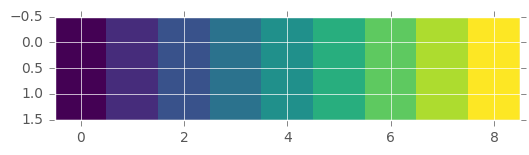

In [48]:
import numpy as np 
damn_son = np.array( [ arange( -5, 4, 1 ), arange( -5, 4, 1 ), ] )
plt.imshow( damn_son, cmap='viridis', interpolation='none' )

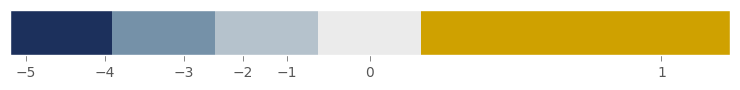

In [69]:
# color map 

from matplotlib import pyplot
import matplotlib as mpl

fig = pyplot.figure(figsize=(8, 3))
ax3 = fig.add_axes([0.05, 0.15, 0.9, 0.15])

cmap = mpl.colors.ListedColormap([
    ( .11, .19, .36 ), # deep blue
    ( .46, .57, .66 ), # medium blue
    ( .71, .76, .80 ), # light blue 
    ( .92, .92, .92 ), # grey 
#     ( .92, .88, .74 ), # light yellow
#    ( .88, .80, .51 ), # medium yellow 
    ( .81, .63, 0. ),  # deep yellow 
    ( .81, .63, 0. ),  # deep yellow 
    ( .81, .63, 0. ),  # deep yellow 
#     ( .81, .63, 0. ),  # deep yellow 
#     ( .81, .63, 0. ),  # deep yellow 
#     ( .81, .63, 0. ),  # deep yellow 
])

cmap.set_over((1., 0., 0.))
cmap.set_under(( .11, .19, .36 ))

#bounds = [-5.2, -3.9, -2.6, -.3, .3, .6, .9, 1.2 ]
bounds = [-5.2, -3.9, -2.6, -.3, .3, .6, .9, 1.2, ] #2.6, 3.9, 5.2 ]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cb3 = mpl.colorbar.ColorbarBase(ax3, cmap=cmap, norm=norm, ticks=[-5, -4, -2, -3, -1, 0, 1], orientation='horizontal')
pyplot.show()

In [70]:
my_params = { 
    'tm': {
        'cmap': 'viridis', 'vmin': -4, 'vmax': 4 , 
    }, 
    'expression': {
        'cmap': 'Greys', 'vmin': -0.2, 'vmax': 1.2 , 
    }, 
    'kcat': {
        'cmap': cmap, 'vmin': -4, 'vmax': 4 , 
    }, 
    'km': {
        'cmap': cmap, 'vmin': -4, 'vmax': 4 , 
    }, 
    'kcatkm': {
        'cmap': cmap, 'vmin': -4, 'vmax': 4 , 
    }, 
    'percent_conserved': {
        'cmap': 'Greys', 'vmin': 0, 'vmax': 1, 
    }, 
}

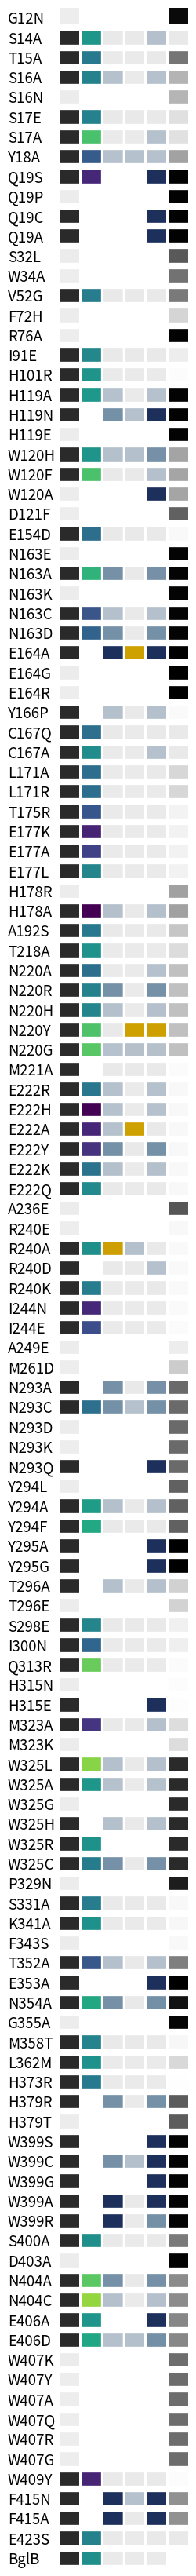

In [71]:
to_plot = enumerate( [ 'expression', 'tm', 'kcat', 'km', 'kcatkm', 'percent_conserved' ] )

plt.figure( figsize=(22,90) ) 
plt.subplots_adjust( left=1., right=1.1 )

for i, col in to_plot:
    plt.subplot( 1, 8, i+3 ) 
    plt.imshow( h[ [ col ] ], interpolation='none', **my_params[ col ] )
    plt.xticks([]); plt.yticks([]) 
    plt.box( 0 ) 

    # white lines 
    for i, r in enumerate( h.index ):
        plt.plot( [ -.5, .5 ], [ i+0.5, i+0.5 ], c='w', lw=6 ) 
        
# mutant labels         
font = { 'fontsize': 15, 'fontname': 'Source Sans Pro', }
for i, r in enumerate( h.index ):
    plt.text( -8.6, i+0.3, r, fontdict=font )

plt.subplots_adjust(wspace=0.1, hspace=0)
#plt.savefig( 'heatmap_out.png', dpi=200 ) 

### Bar plot style 

using minimalistic bar plots, with a thick band indicating a 2-fold spread around native values. 

In [77]:
# bar plot style 

b_cols = [ 'kcat', 'err_kcat', 'km', 'err_km', 'kcatkm', 'err_kcatkm' ] 
j = df[ b_cols ].copy()
j = log10( j ) 

In [78]:
j.loc['BglB']

kcat          2.944483
err_kcat      1.000000
km            0.698970
err_km       -0.698970
kcatkm        5.240549
err_kcatkm    3.903090
Name: BglB, dtype: float64

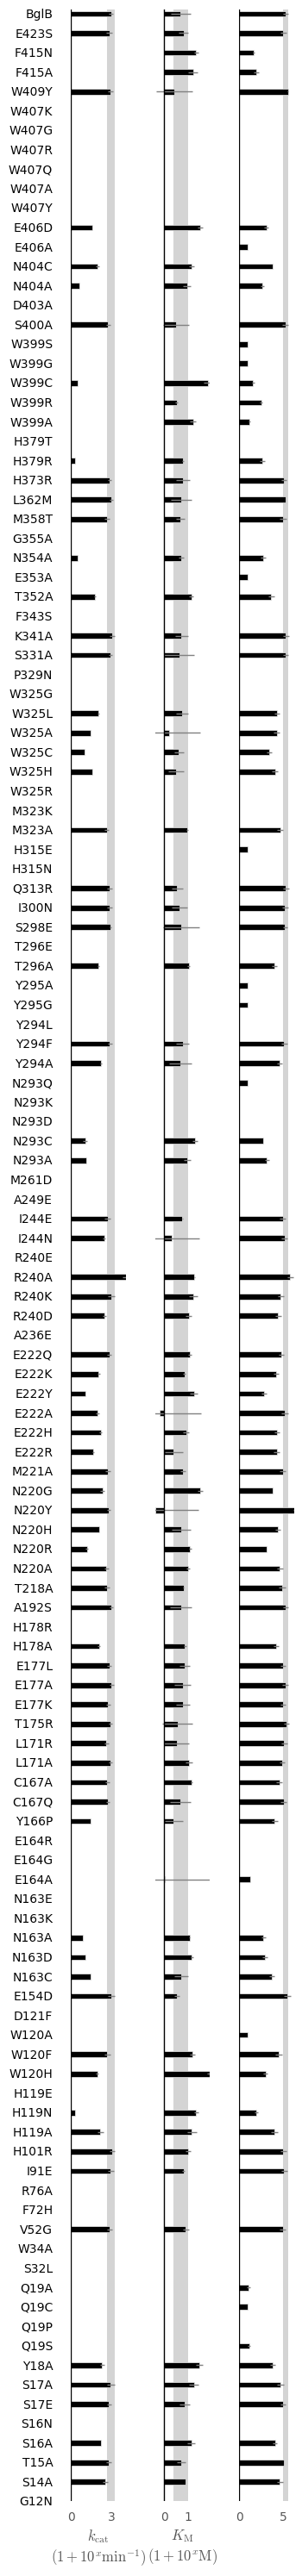

In [79]:
#http://faculty.washington.edu/stuve/log_error.pdf
#describes how to log error bars 

plt.figure( figsize=(5,30) ) 

bar_cols = [ 
    ( 'kcat', 'err_kcat', u'$k_{\mathrm{cat}}$\n$( 1 + 10^x \mathrm{min}^{-1})$' ), 
    ( 'km', 'err_km', u'$K_{\mathrm{M}}$\n$( 1 + 10^x \mathrm{M} )$' ), 
    ( 'kcatkm', 'err_kcatkm', '' ), 
]

for i, ( col, err, fmt_str ) in enumerate( bar_cols ):
    plt.subplot( 1, 5, i+1 )
    x_vals = [ i for i in range( len( j ) ) ]
    plt.barh( x_vals, j[col], color='k', height=0.3, edgecolor=None, 
        xerr=0.434*j[err]/j[col],
        ecolor='gray', capsize=0, align='center' )
    plt.tick_params( length=0 ) 
    plt.yticks([])

    my_val = j.loc['BglB'][ col ]              
    plt.fill_between( [my_val - 0.3, my_val + 0.3], 128.2, color=(0,0,0,0.17), linewidth=0 ) 
    
    plt.xticks( [ 0, my_val.round() ] )
    plt.box( 0 ) 
    
    plt.plot( ( 0, 0 ), ( 0, 128.2 ), color='k' ) 
    plt.xlabel( fmt_str )  

for i, r in enumerate( j.index ):
    font = { 'horizontalalignment': 'right' }
    plt.text( -21, i-.2, r, fontdict=font )

plt.subplots_adjust( wspace=0 )
plt.tight_layout()
#plt.savefig( 'bar_plot_out.png', dpi=600 ) 

In [80]:
# kinetic constants versus tm 

In [81]:
from scipy.stats import pearsonr 

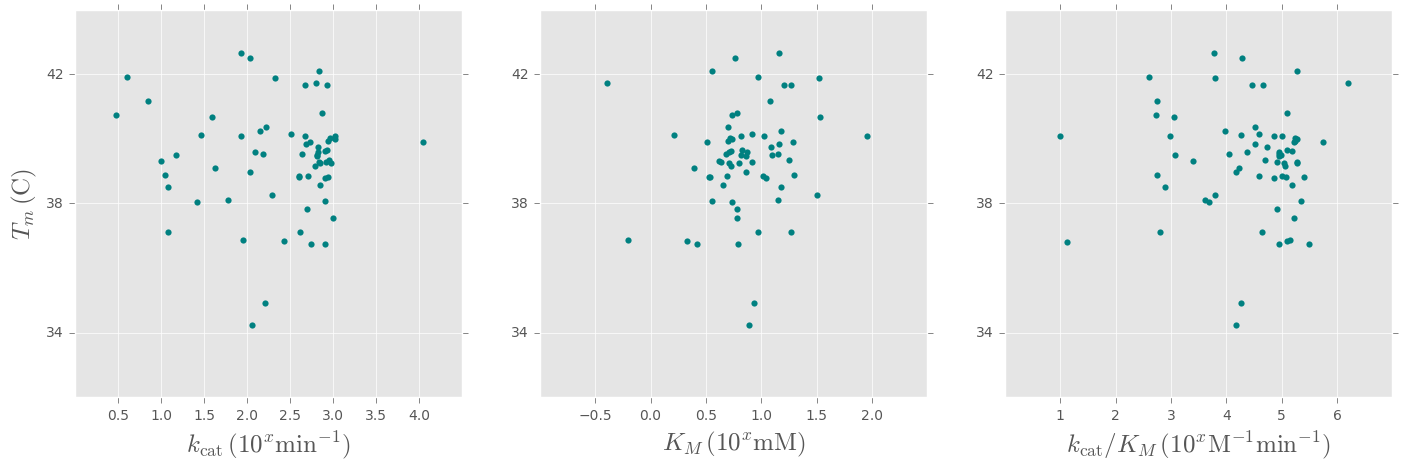

In [82]:
plt.style.use( 'ggplot' )

constants = [ 
    ( 'kcat', 880, '$k_{\mathrm{cat}}\,(10^x \mathrm{min}^{-1})$' ),
    ( 'km', 5.5, '$K_M\,(10^x \mathrm{mM})$' ),
    ( 'kcatkm', 17400, '$k_{\mathrm{cat}}/K_M\,(10^x \mathrm{M}^{-1}\mathrm{min}^{-1})$' ),
] 

plt.figure( figsize=( 17, 5 ) ) 

for idx, ( constant, native_value, fmt_str ) in enumerate( constants ):
    
    x = log10( df[ constant ] ) 
    y = df.tm
    my_log_value = log10( native_value ) 
    
    plt.subplot( 1, 3, idx+1 ) 
    plt.scatter( x, y, color='teal', lw=0 ) 
    
    my_x_ticks = plt.xticks()[0]
    plt.xticks( my_x_ticks[1:-1] )
    plt.yticks( [ 34, 38, 42 ] )

    plt.xlabel( fmt_str, fontsize=18, fontname='Source Sans Pro' )
    if idx == 0:
        plt.ylabel( '$T_m\,(\mathrm{C})$', fontsize=18, fontname='Source Sans Pro' )
        
#plt.savefig( 'tm_versus_all.png', dpi=600 ) 

In [42]:
# single feature correlations

In [ ]:
# machine learning results 